In [1]:
import pandas as pd 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

In [20]:

def plot_confusion_matrix(true,pred,title=None):
    fig,ax=plt.subplots(figsize = (9,7))
    sns.heatmap(confusion_matrix(true,pred),
                yticklabels=["Low","Medium","High"],
                xticklabels=["Low","Medium","High"], 
                annot=True, fmt='d')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Truth')
    ax.set_title(title)
    

In [16]:

def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)
    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], color='green',  alpha=0.8, label='Low')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], color='orange', alpha=0.8, label='Medium')
    plt.scatter(X_t[np.where(y1 == 2), 0], X_t[np.where(y1 == 2), 1], color='red', alpha=0.8, label='High')

    plt.legend(loc='best')
    plt.show()
    

In [9]:
data=pd.read_excel("cancer patient data sets.xlsx")
data=data.dropna()
data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
data["Level"]=data["Level"].replace({"Low":0,"Medium":1,"High":2})
data.drop(columns=["Patient Id"],inplace=True)

In [7]:
X=data.drop(columns=["Level"])
y=data["Level"]


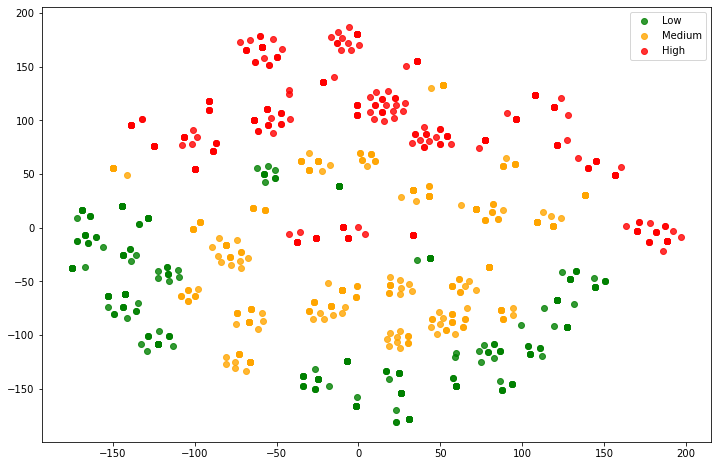

In [17]:
tsne_plot(X, y)

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2)


Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



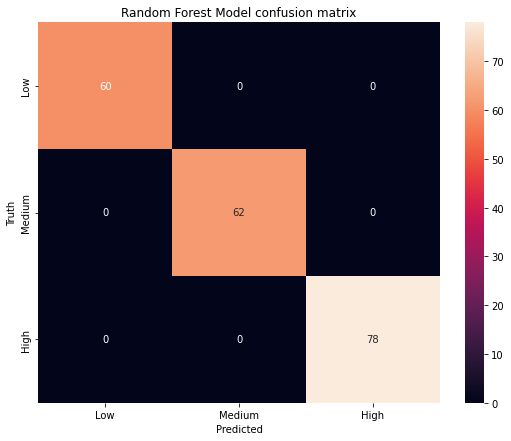

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                           criterion="gini")

RFC.fit(X_train,y_train)
RFC_pred=RFC.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,RFC_pred)}")
print(classification_report(y_test,RFC_pred))
plot_confusion_matrix(y_test,RFC_pred,title="Random Forest Model confusion matrix")


Accuracy : 0.97
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.97      0.94      0.95        62
           2       0.95      1.00      0.97        78

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



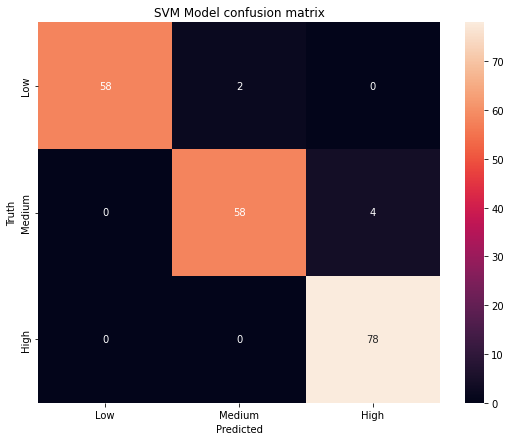

In [22]:
from sklearn.svm import SVC
svm=SVC(C=1,
        kernel="rbf")
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,svm_pred)}")
print(classification_report(y_test,svm_pred))
plot_confusion_matrix(y_test,svm_pred,title="SVM Model confusion matrix")
